Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 69ms/step - accuracy: 0.6142 - loss: 0.6185 - val_accuracy: 0.8546 - val_loss: 0.3539
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8957 - loss: 0.2724 - val_accuracy: 0.8712 - val_loss: 0.3108
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8650 - loss: 0.3241


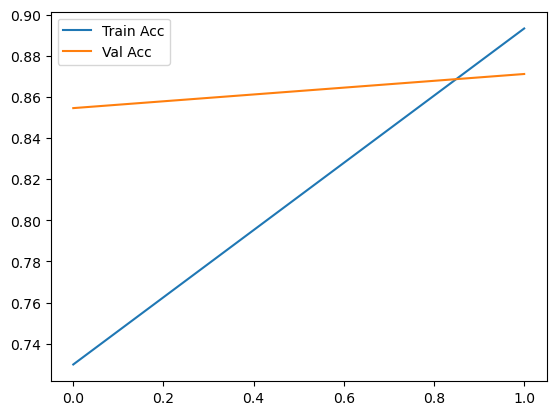

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense,Embedding,LSTM,Bidirectional
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=10000
max_length=200
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=vocab_size)
X_train=pad_sequences(X_train, maxlen=max_length)
X_test=pad_sequences(X_test, maxlen=max_length)

model=Sequential([
    Embedding(vocab_size,8),
    Bidirectional(LSTM(8,return_sequences=False)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=2,batch_size=32,validation_split=0.2)

model.evaluate(X_test,y_test)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

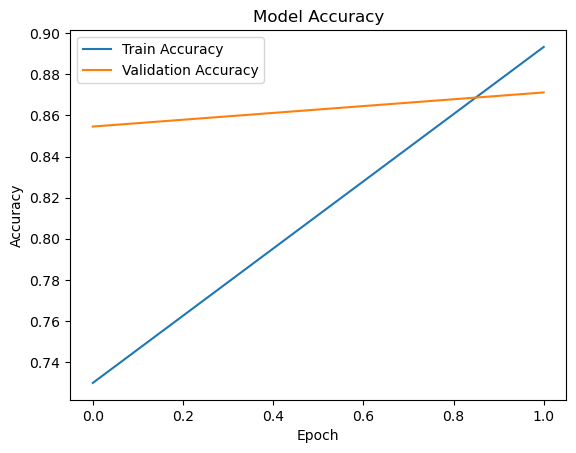

In [3]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()